# CSCA5632 Unsupervised Learning Final Project - Student Performance Prediction

## Introduction

In this project, I will use unsupervised learning techniques to predict students' exam performance. The main goal is to explore various models and approaches to effectively analyze and predict exam outcomes based on the available dataset. This involves focusing on model building, training, and evaluation, with a particular emphasis on tailoring the methods to suit the unique characteristics of the data.

## Data Overview

The dataset is available at https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data. It was not collected from real-world examples, such as experiments conducted with university students, but instead was randomly generated by the author for educational purposes.

### Import Libraries

In [36]:
# Import necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode

### Data Import

In [19]:
data = pd.read_csv('./data/StudentPerformanceFactors.csv')

### Inital Look

In [20]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [22]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Datasent contains 20 columns and 6607 rows. The types of data are divided into number and categorical. With 3 columns containing small number of NaN, the data is relatively clean.

## Exploratory Data Analysis(EDA) - Inspect, Visualize, and Clean the Data

First, let's remove the rows with NaN values from the data. There are three columns containing NaN values, each accounting for less than 1% of the total data, so dropping these rows is a reasonable approach.

In [23]:
data = data.dropna()
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Now the data is clean, let's divide the data into numerical and categorical then visualize them.

In [31]:
numeric_data = data.select_dtypes(include=['number'])
categorical_data = data.select_dtypes(include=['object'])

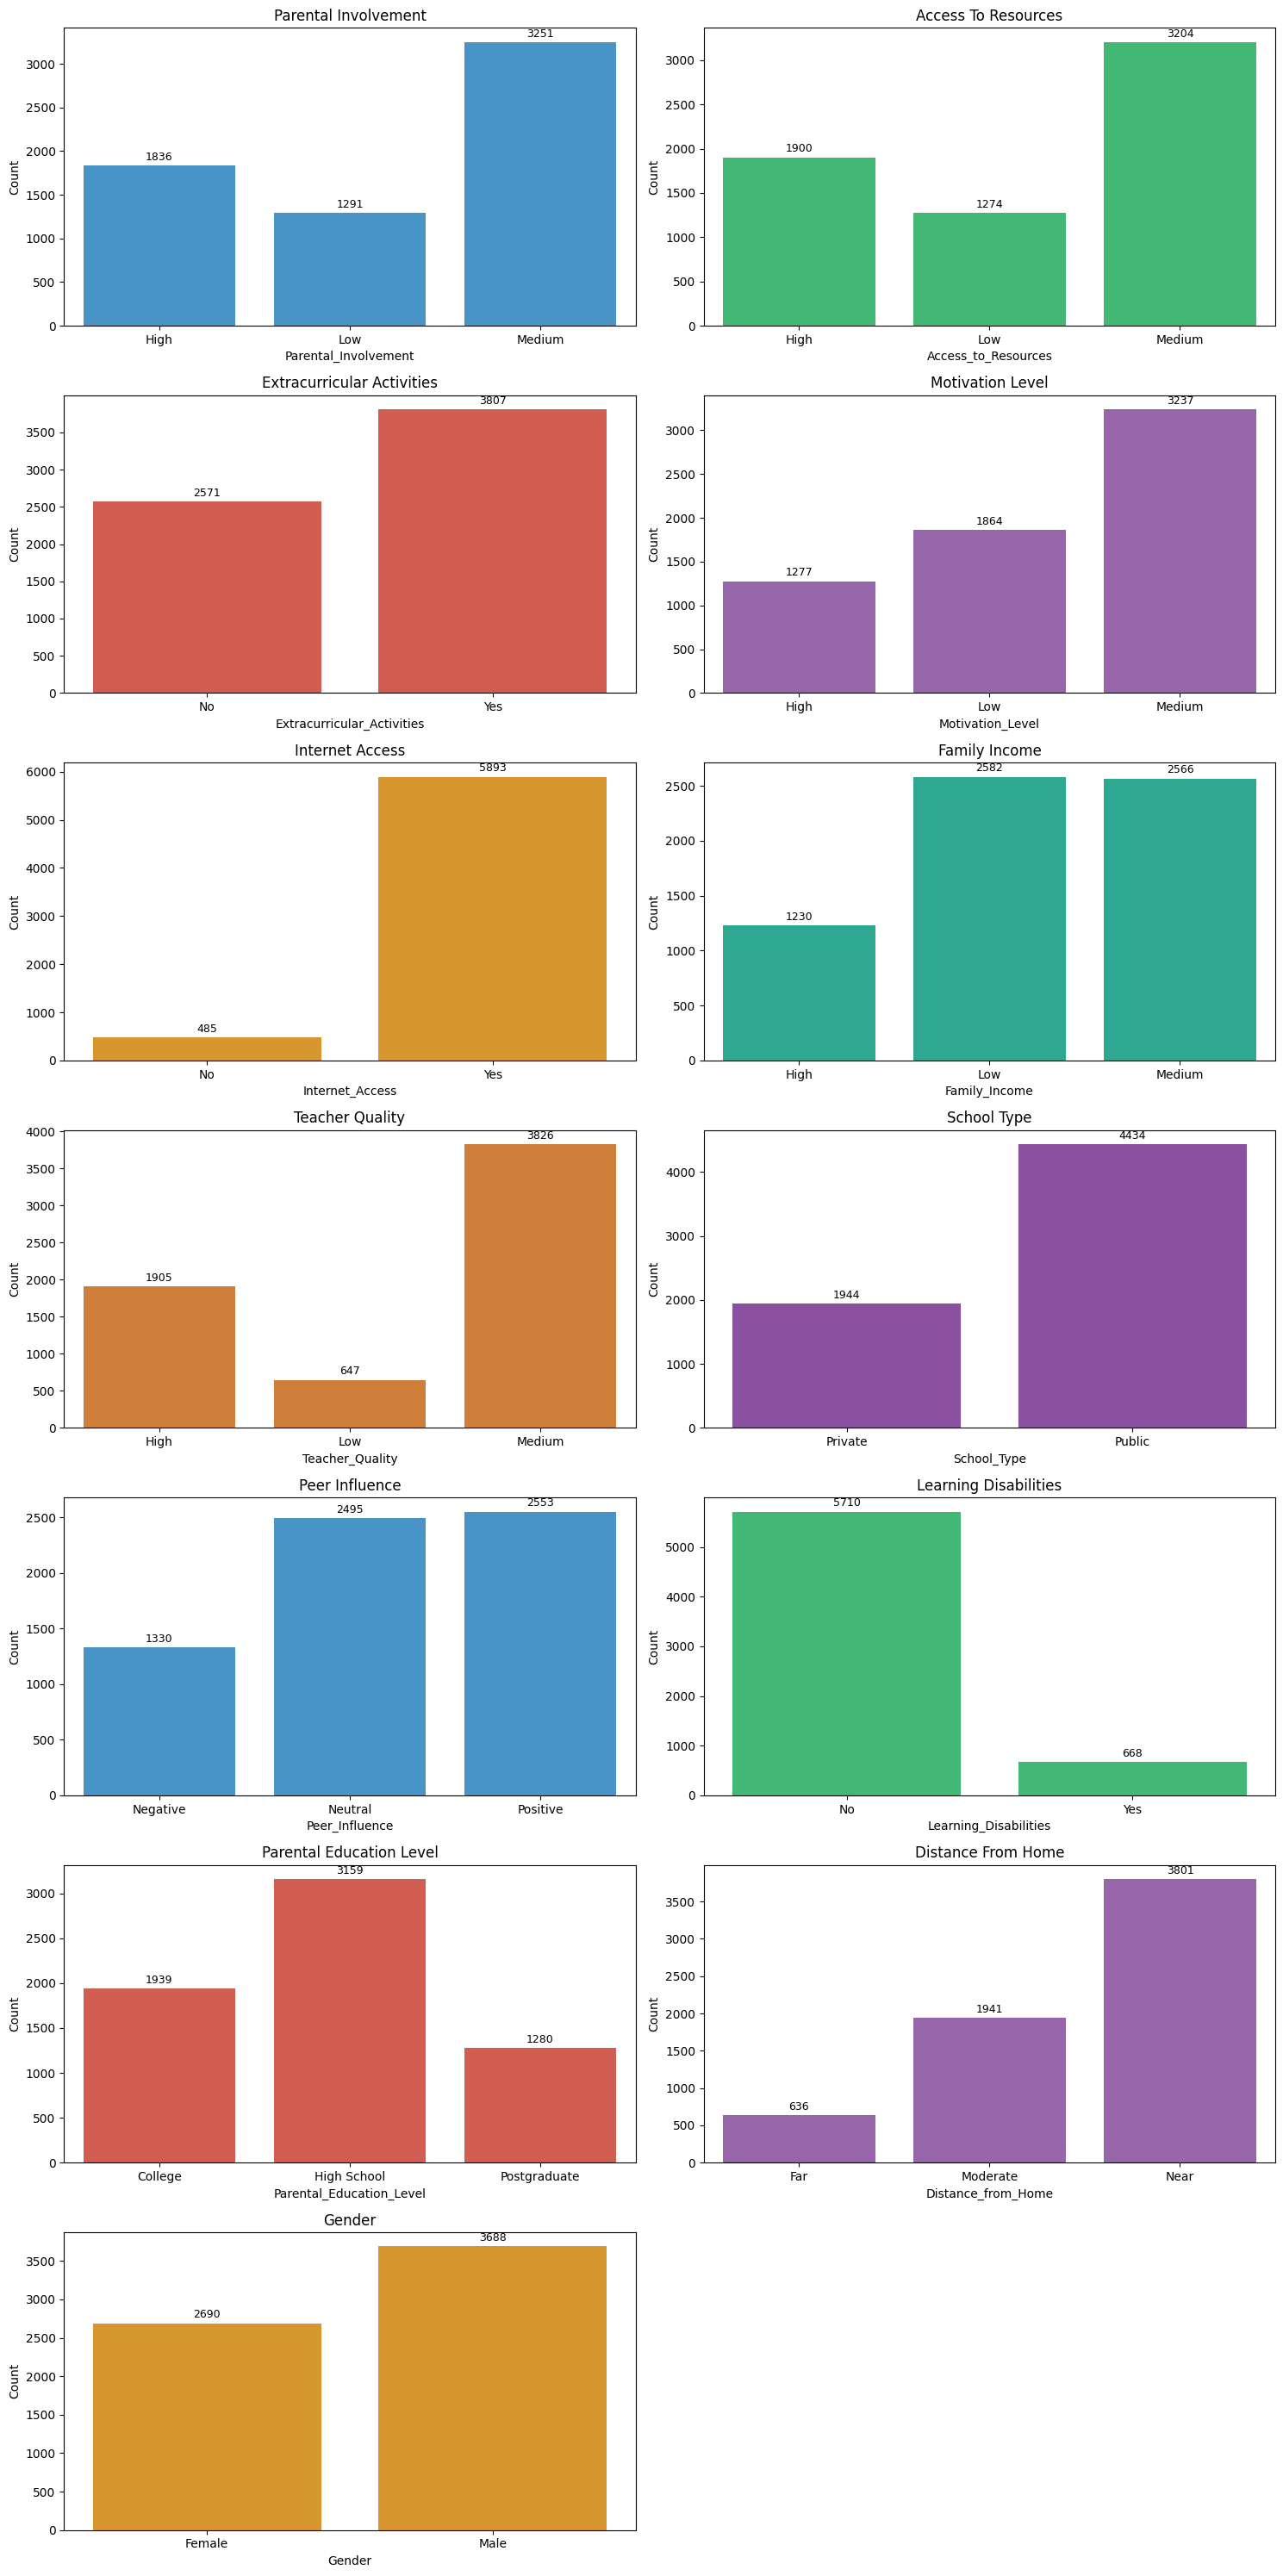

In [25]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each categorical column
for i, column in enumerate(categorical_data.columns):
    counts = data[column].value_counts().sort_index()
    plt.subplot((len(categorical_data.columns) + 1) // 2, 2, i + 1)
    sns.barplot(x=counts.index, y=counts.values, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Count')
    # Annotate counts above each bar
    for j, count in enumerate(counts):
        plt.text(j, count + (max(counts) * 0.01), str(count), ha='center', va='bottom', fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

These bar graphs help me visualize and understand the data easily. One thing that stands out about this categorical dataset is that there is about 30% more male than female. 

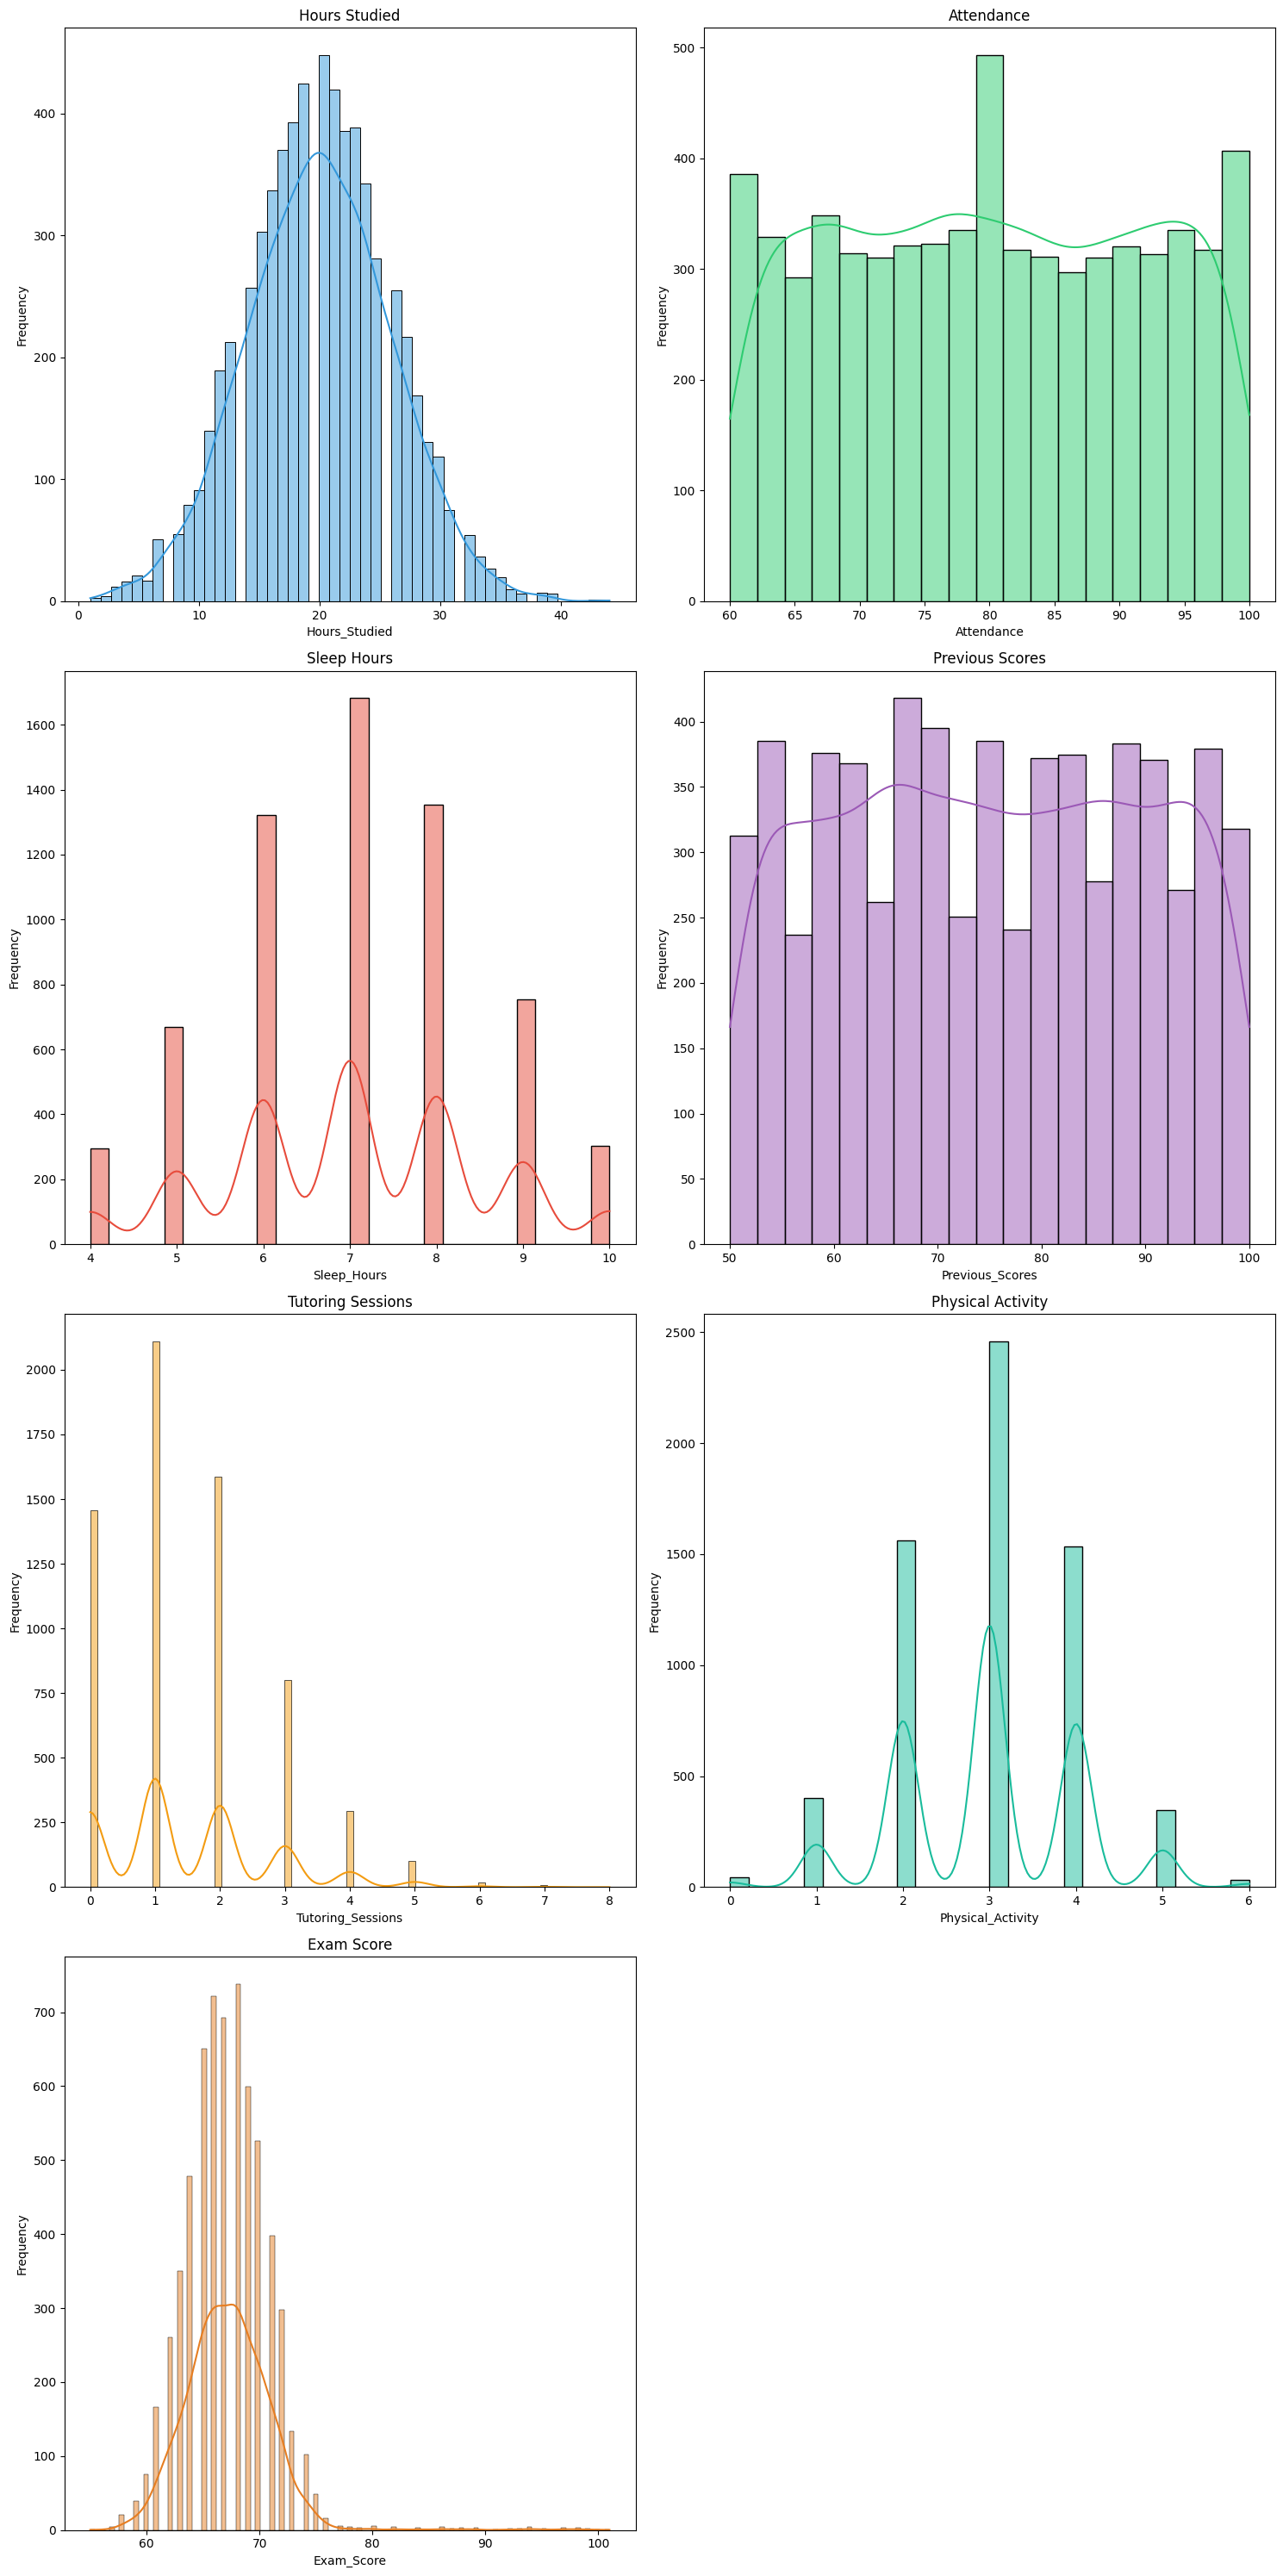

In [26]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each numeric column
for i, column in enumerate(numeric_data.columns):
    plt.subplot((len(numeric_data.columns) + 1) // 2, 2, i + 1)
    sns.histplot(numeric_data[column], kde=True, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Since we are on numerical data, let's run heatmap to checkout the relationship between each columns.

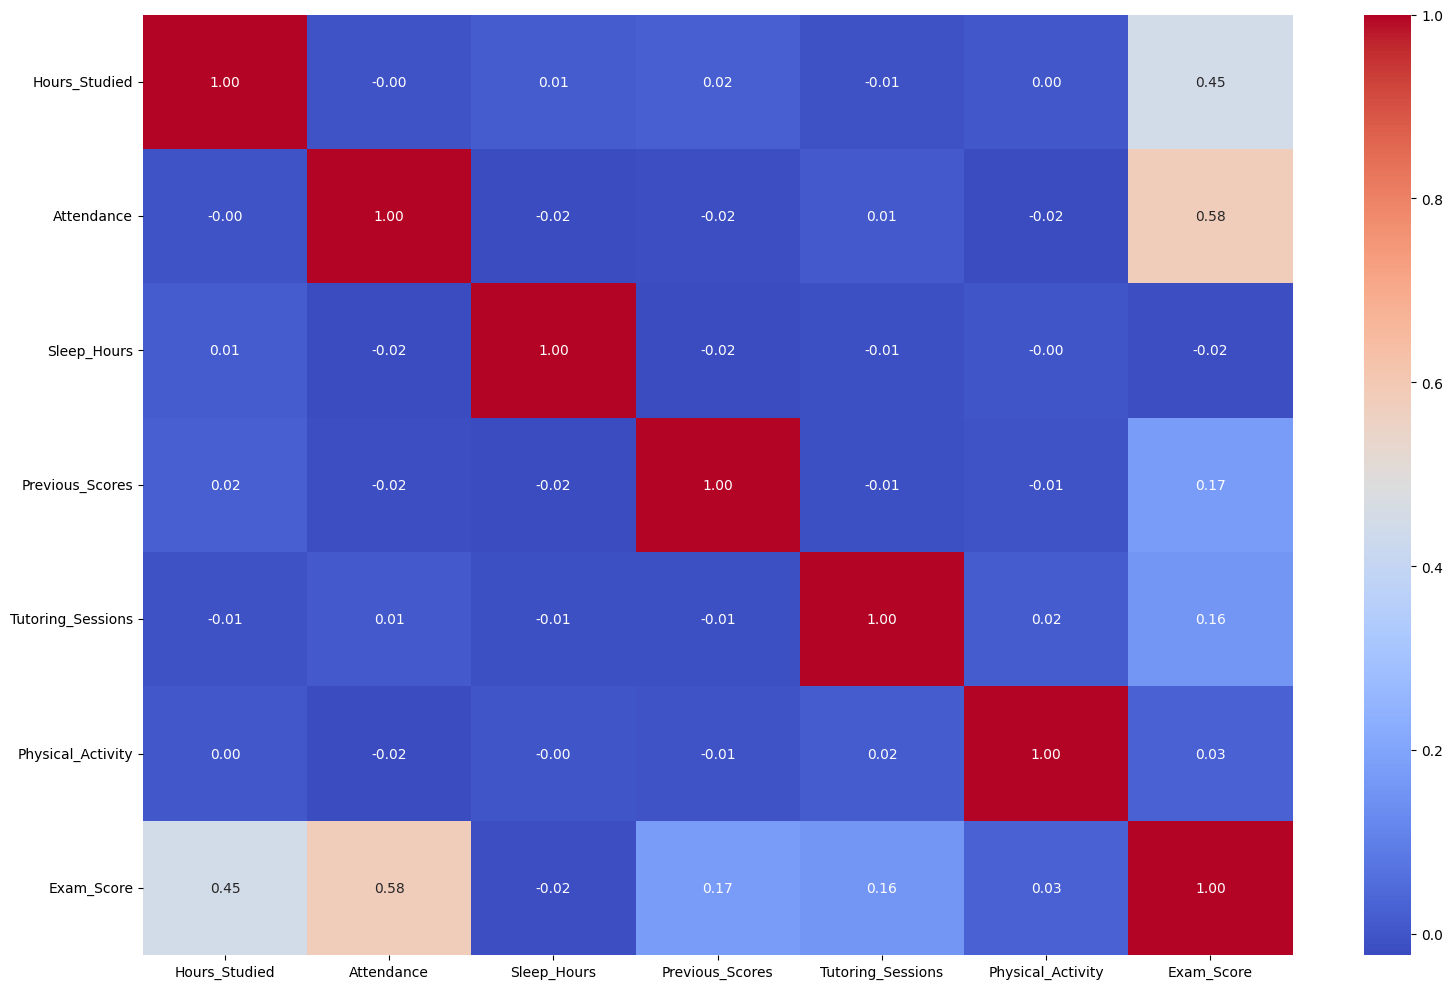

In [17]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

From the heatmap above, we can see that `Exam_Score` and `Attendance` have strong correlation with score of 0.58. Second strongest correlation goes to `Exam_Score` and `Hours_Studied` with 0.45.
From my experience, it makes sense that the more time students spend studying, the higher their exam scores tend to be. Let's zoom into the relationship between `Exam_Score` and `Hours_Studied`.

<Figure size 800x800 with 0 Axes>

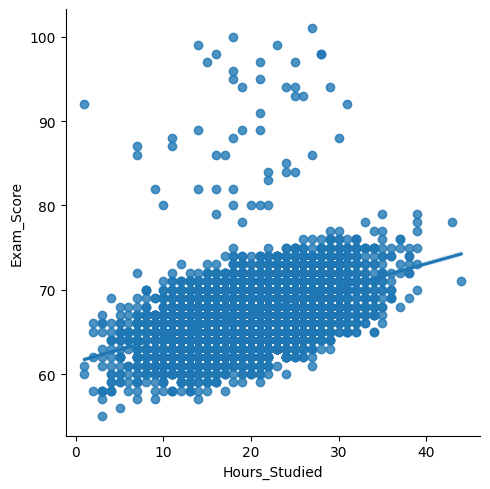

In [28]:
plt.figure(figsize=(8,8))
sns.lmplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.show()

It's interesting to note that those students that studied between 20 to 30 hours had the highest exam score, but not those that spent over 40 hours of study.

## Perform Analysis Using Unsupervised Learning Models

I have selected K-Means Clustering and PCA for unsupervised learning models and I'll be comparing their performance against supervised learning model linear regression.
For predicting student performance on exams using unsupervised learning, the clustering methods that group similar students based on their characteristics can help me identify patterns in exam performance. Although unsupervised learning doesn't predict specific outcomes, it can offer valuable insights for segmenting the data into performance-related clusters.
K-Means Clustering would segment students into clusters based on similar attributes(e.g., hours studied, attendance, motivation, etc.). This model can reveal patterns or "groups" within the data, like clusters of high-performing students and low-performing ones based on their study habits, attendance, and other features.
Principal Component Analysis(PCA), while not a clustering algorithm, PCA can reduce the dataset's dimensionality, identifying the most significant features that contribute to variations in exam scores.
PCA can reveal which factors most influence differences in student performance, helping me to interpret the underlying structure of the data and focus on key performance indicators.

Let's start the analysis with K-Means Clustering with PCA applied.

In [32]:
# K-means clustering with PCA

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA, keeping 2 components for visualization or fewer components to retain variance
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-Means clustering to the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume 3 clusters for this example
kmeans.fit(pca_data)
labels = kmeans.labels_

# Calculate silhouette score to evaluate the clustering quality
silhouette_avg = silhouette_score(pca_data, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate RMSE based on Euclidean distance to the nearest centroid
centroids = kmeans.cluster_centers_
rmse = np.sqrt(mean_squared_error(pca_data, centroids[labels]))
print(f'RMSE of clustering: {rmse:.4f}')

# Display explained variance ratio by PCA components
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio by PCA Components: {explained_variance}')


Silhouette Score: 0.3292
RMSE of clustering: 0.7928
Explained Variance Ratio by PCA Components: [0.25236016 0.14893348]


The silhouette score ranges from -1 to 1, with values closer to 1 indicating well-defined clusters, and values closer to 0 indicating overlapping clusters or lack of distinct boundaries.
A score of 0.3292 suggests that the clusters are moderately defined but not highly distinct. This could mean there is some similarity within clusters but also some overlap between them. It indicates that the K-means clustering has found some grouping structure, though it might not be sharply distinct.
RMSE(Root Mean Squared Error) here measures the error between the actual values of the `Exam_Score` and the predicted values based on cluster centroids.
An RMSE of 0.7928 indicates a moderate error level, suggesting that K-means clustering, even with PCA, may not accurately capture the specific exam performance patterns. This is expected since K-means is primarily a clustering method, not optimized for precise prediction.
The PCA has reduced the dataset to two principal components, where the first component explains approximately 25.2% of the total variance in the dataset and the second component explains about 14.9%.
Together, these two components capture around 40% of the overall variance, which is moderate but may imply that more components would be needed to retain a more complete representation of the original data.
Applying PCA before K-means has likely helped reduce the dimensionality and noise, leading to moderately distinguishable clusters. However, since only 40% of the variance is captured by the first two PCA components, the clustering result may not fully represent the original complexity of the data. The silhouette score and RMSE further indicate that, while there is some structure, the clusters do not provide a high-accuracy grouping for predicting `Exam_Score`. This clustering could still be valuable for exploratory analysis, helping to identify general patterns or types of student profiles based on their attributes.

Now let's tune up hyperparameters to find optimum number of clusters. 

Number of clusters: 2, Silhouette Score: 0.1279, Inertia: 33457.06766407419
Number of clusters: 3, Silhouette Score: 0.1205, Inertia: 30452.479939606364
Number of clusters: 4, Silhouette Score: 0.1188, Inertia: 27992.90223726037
Number of clusters: 5, Silhouette Score: 0.1208, Inertia: 26125.193743703116
Number of clusters: 6, Silhouette Score: 0.1174, Inertia: 24709.945807349846
Number of clusters: 7, Silhouette Score: 0.1188, Inertia: 23402.900679430237
Number of clusters: 8, Silhouette Score: 0.1182, Inertia: 22406.15879477112
Number of clusters: 9, Silhouette Score: 0.1180, Inertia: 21594.69044312823


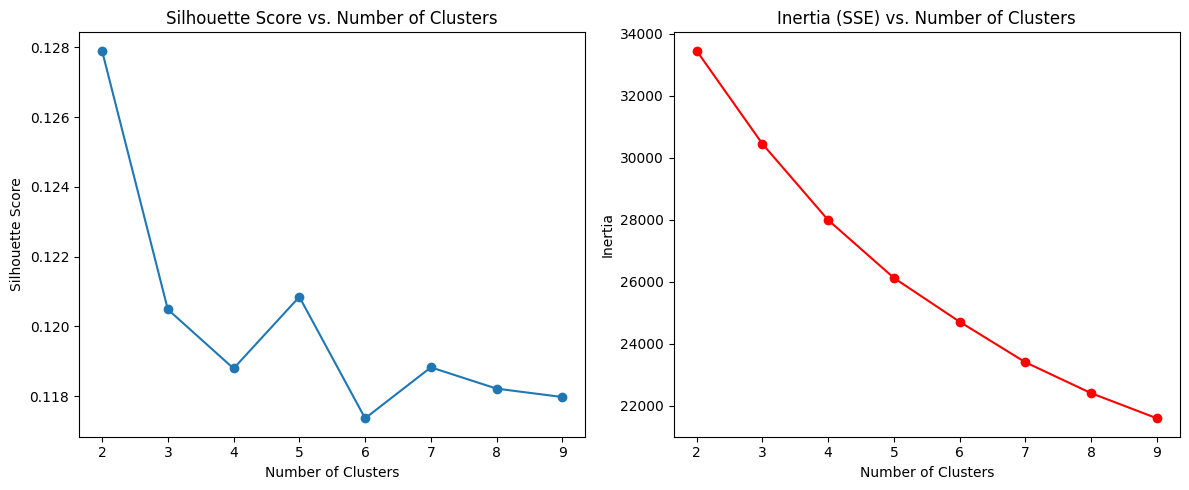

In [40]:
# List to store Silhouette Scores
silhouette_scores = []
inertia_scores = []

# Range of cluster numbers to try
cluster_range = range(2, 10)

# Drop the Exam_Score column since it's now part of labels
X = numeric_data.drop(columns=['Exam_Score'])
y = data['Performance_Level']

# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Loop over different cluster sizes
for n_clusters in cluster_range:
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_X)
    
    # Calculate Silhouette Score and Inertia
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    inertia = kmeans.inertia_
    
    silhouette_scores.append(silhouette_avg)
    inertia_scores.append(inertia)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}, Inertia: {inertia}")

# Plot Silhouette Scores and Inertia to find the optimal cluster number
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_scores, marker='o', color='red')
plt.title("Inertia (SSE) vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

The optimal number of clusters can be chosen by looking at both the Silhouette Score and the Inertia (SSE) values.
Generally, a higher Silhouette Score is better. Here, the Silhouette Score is highest when the number of clusters is 2(0.1279), although the score is relatively low overall, indicating the clusters might not be very distinct.
For Inertia, look for the "elbow" point where adding more clusters does not significantly reduce inertia. While there’s a steady decrease in inertia, there isn’t a sharp elbow, but the rate of decrease starts to slow around 4-5 clusters.
Neither metric gives a very clear answer. If prioritizing Silhouette Score, using 2 clusters make most sense as it has the highest Silhouette Score.
If considering a balance between both metrics, set 4 or 5 clusters as a possible optimal cluster count since the inertia reduction begins to taper off around these values.

Let's run a visualization of the clusters to see how well-separated they are for each of the cluster counts.

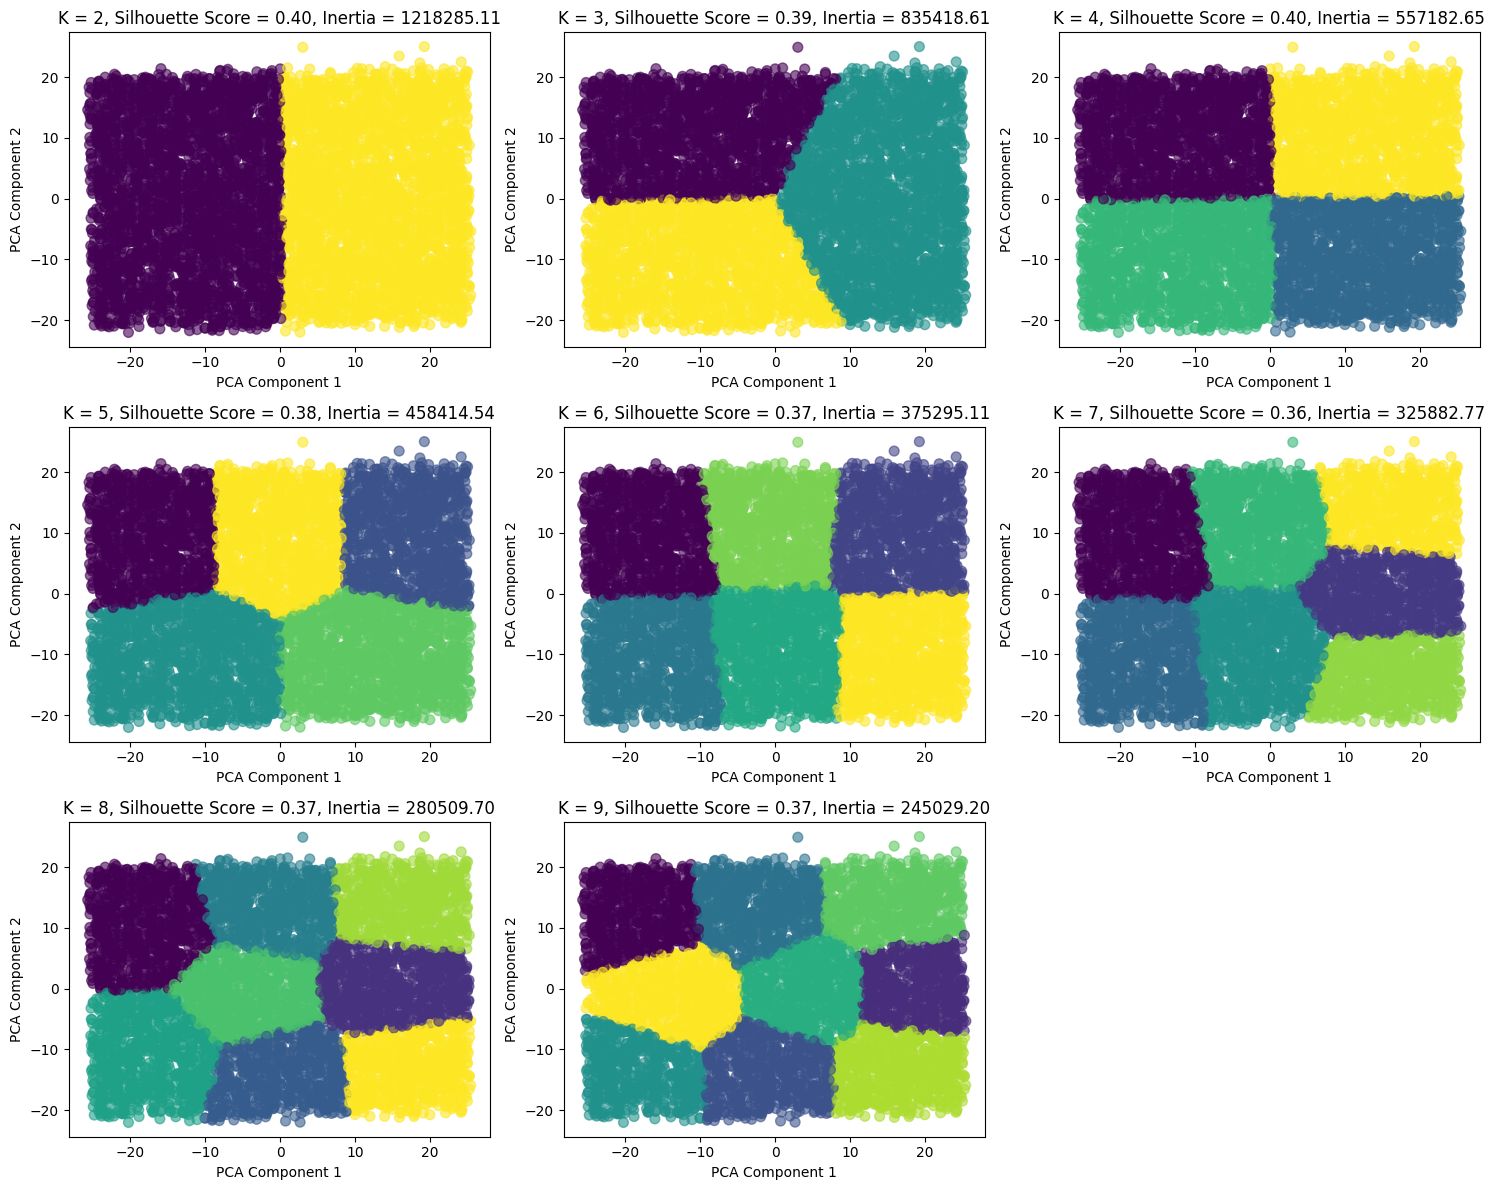

In [42]:
# Assuming 'data' contains the dataset after encoding categorical variables and standardizing numeric columns
data = pd.get_dummies(data)  # encode categorical variables

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Define range of clusters to try
cluster_counts = range(2, 10)

plt.figure(figsize=(15, 12))

# Iterate over each cluster count and plot the results
for i, n_clusters in enumerate(cluster_counts, 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(pca_data)
    
    # Calculate silhouette score for each clustering (optional)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    inertia = kmeans.inertia_
    
    # Plot clusters
    plt.subplot(3, 3, i)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50, alpha=0.6)
    plt.title(f'K = {n_clusters}, Silhouette Score = {silhouette_avg:.2f}, Inertia = {inertia:.2f}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

As seen in the plot, they all have nicely separated compact clusters. From this visualization, it's tough to determine the optimum number of clusters.

Let's compare the accuracy of K-Means by comparing with PCA and without PCA.

In [41]:
# Define target labels (optional: based on `Exam_Score`)
# For simplicity, we'll divide Exam_Score into 3 categories: Low, Medium, High
# Modify thresholds as necessary based on data distribution
data['Performance_Level'] = pd.cut(data['Exam_Score'], bins=3, labels=[0, 1, 2])

# K-Means without PCA
kmeans_no_pca = KMeans(n_clusters=3, random_state=42)
labels_no_pca = kmeans_no_pca.fit_predict(scaled_X)

# Map K-Means clusters to the nearest target labels for accuracy
def calculate_cluster_accuracy(labels, y_true):
    # Map each cluster label to the true labels for accuracy calculation
    mapped_labels = np.zeros_like(labels)
    for i in range(3):  # Assuming 3 clusters
        mask = (labels == i)
        mapped_labels[mask] = mode(y_true[mask])[0]
    return accuracy_score(y_true, mapped_labels)

accuracy_no_pca = calculate_cluster_accuracy(labels_no_pca, y)
print(f'Accuracy without PCA: {accuracy_no_pca:.4f}')

# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
pca_X = pca.fit_transform(scaled_X)

# K-Means with PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_X)

# Calculate accuracy with PCA-transformed data
accuracy_pca = calculate_cluster_accuracy(labels_pca, y)
print(f'Accuracy with PCA: {accuracy_pca:.4f}')

Accuracy without PCA: 0.8346
Accuracy with PCA: 0.8346


The consistency in accuracy between the K-means model with and without PCA suggests that dimensionality reduction through PCA did not significantly impact the model’s ability to cluster the data. This could indicate that most of the information relevant for clustering is already contained within the primary dimensions or features.
The fact that the accuracy is quite high(83.46%) indicates that the K-means clustering aligns well with the `Performance_Level` labels, meaning that the chosen features contribute effectively to forming distinguishable clusters based on student performance.
Since PCA didn't improve accuracy here, K-means on the original features might be just as effective for this dataset.

### Compare Performance Against Supervised Learning Model - Linear Regression



In [37]:
# Separate features and target variable
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R² score as accuracy
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2:.4f}")

R² Score (Accuracy): 0.9573
